# ***FILM PERFOMANCE ANALYSIS***

---





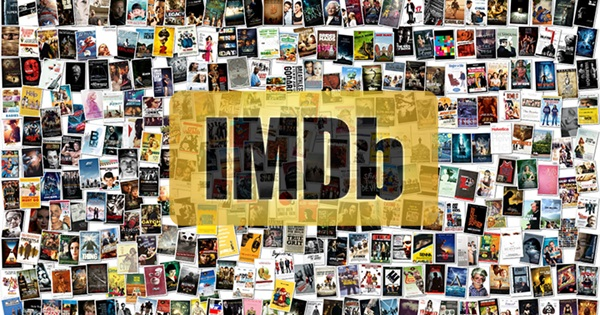

## **Overview**

---



This project aims to use exploratory data analysis(EDA) among other data anlysis tools to generate valuable market foresight in the film industry for a business stakeholder.

## ***Business Problem***

---

The company sees an opportunity in venturing into original video creation.They have decided to create a new movie studio,the current market is dominated by established studios with strong franchises, massive marketing budgets, and global distribution power.

The aim is to determinine what types of films a new studio can produce that align with current audience demand, minimize financial risk, and still allow the company to compete for box-office revenue.

## ***Data Understanding And Preparation***

---
The dataset is derived from publicly available movie databases including Box Office Mojo, IMDb, Rotten Tomatoes, and The Movie Database.These sources are widely recognized platforms that aggregate data from industry reports, critics, and user contributions, making the dataset suitable for analyzing relationships between movie characteristics, reception, and commercial success.



In [ ]:
# import the relevant libraries

import pandas as pd
from scipy.stats import skew, kurtosis
import numpy as np
import _sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
import ast
from scipy.stats import norm


We used three datasets to do our analysis and come up with actionable insights.



#1.bom.movies.csv

* This is a csv file that contains movies, studio, gross domestically and foreign and year of release.

In [ ]:
# Loading our dataset

df = pd.read_csv('Data/bom.movie_gross.csv')
df.head(10) # Quick look at our data

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
5,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010
6,Iron Man 2,Par.,312400000.0,311500000,2010
7,Tangled,BV,200800000.0,391000000,2010
8,Despicable Me,Uni.,251500000.0,291600000,2010
9,How to Train Your Dragon,P/DW,217600000.0,277300000,2010


In [ ]:
# How big is our data?
df.shape

(3387, 5)

In [ ]:
# what type of columns are we working with?
df.columns

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [ ]:
# General summary of our data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [ ]:
# Statistical summary for the numeric columns.
df.describe()

,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000




*   Mean is much higher than the median indicating a right skewed distribution caused by a few movies earning higher revenue.
*   Revenues vary widely, from very low grossing movies to extremely sucessfull.

*  Most movies in the dataset were released around 2013-2014.

* More movies earn more internationally than domestically.

* Foreign earnings vary even more widely than domestic earnings.



In [ ]:
# Check for missing values.
df.isnull().sum()

title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

In [ ]:
# Dropping the missing values
df_cleaned = df.dropna(subset=["domestic_gross", "foreign_gross"])

In [ ]:
# Converting the foreign_gross column to a numeric column
for col in ["domestic_gross", "foreign_gross"]:
    df_cleaned[col] = pd.to_numeric(
        df_cleaned[col].astype(str).str.replace(",", ""),
        errors="coerce"
    )

C:\Users\compweb\AppData\Local\Temp\ipykernel_10196\734072323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(
C:\Users\compweb\AppData\Local\Temp\ipykernel_10196\734072323.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = pd.to_numeric(


In [ ]:
# Feature Engineering
df_cleaned["net_gross"] = (
    df_cleaned["domestic_gross"] + df_cleaned["foreign_gross"]
)

C:\Users\compweb\AppData\Local\Temp\ipykernel_10196\3159865547.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned["net_gross"] = (


* Looking at only domestic or only foreign gross gives a partial and sometimes misleading picture.

* Net gross gives you a movie’s total box-office performance, not just how it did in one market.



In [ ]:
# Do we have any duplicated values?
df.duplicated().sum()

np.int64(0)



*   There are no duplicated values in our dataset.



In [ ]:
# Resetting the dataframe index
df_cleaned = df.reset_index(drop=True)

In [ ]:
# Verifying changes
df_cleaned.shape
df_cleaned.info()
df_cleaned.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


title                0
studio               5
domestic_gross      28
foreign_gross     1350
year                 0
dtype: int64

#2.The tmdb.csv

This file  contains info on various aspects of different movies like title, release date , ratings e.t.c

In [ ]:
tm_df = pd.read_csv('Data/tmdb.movies.csv',index_col=0)
tm_df.head(10)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
5,"[12, 14, 10751]",32657,en,Percy Jackson & the Olympians: The Lightning T...,26.691,2010-02-11,Percy Jackson & the Olympians: The Lightning T...,6.1,4229
6,"[28, 12, 14, 878]",19995,en,Avatar,26.526,2009-12-18,Avatar,7.4,18676
7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340
8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057
9,"[16, 28, 35, 10751, 878]",38055,en,Megamind,22.855,2010-11-04,Megamind,6.8,3635


In [ ]:
# How big is our data?
tm_df.shape

(26517, 9)



*   Our dataset has 26,517 columns and 10 rows.


In [ ]:
# General summary of our data
tm_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB




*  Our dataset has no missing values.
*  The release date column is of type object and should be converted to datetime.



# ***Data Cleaning***

---



In [ ]:
# What is the genre_id column made of

tm_df['genre_ids'].head()

0        [12, 14, 10751]
1    [14, 12, 16, 10751]
2          [12, 28, 878]
3        [16, 35, 10751]
4          [28, 878, 12]
Name: genre_ids, dtype: object



*   Genre Id which is an important column is not readable and it would be better if we can map the genre_ids to their respective genres.

In [ ]:
# strings to integers

tm_df['genre_ids'] = tm_df['genre_ids'].apply(
    lambda x: list(map(int, ast.literal_eval(x)))
)




*  genre ids are stored inside python strings we have to convert them to integers for our mapping to work.



In [ ]:
# mapping our genres
genre_map = {
    28: "Action",
    12: "Adventure",
    16: "Animation",
    35: "Comedy",
    18: "Drama",          # TMDB Genre mapping
    14: "Fantasy",
    27: "Horror",
    53: "Thriller",
    80: "Crime",
    878: "Science Fiction",
    10749: "Romance",
    10751: "Family"
}


In [ ]:
tm_df['genres'] = tm_df['genre_ids'].apply(
    lambda ids: [genre_map.get(i, 'Other') for i in ids]
)


In [ ]:
tm_df['genres'].head(10)

0                         [Adventure, Fantasy, Family]
1              [Fantasy, Adventure, Animation, Family]
2                 [Adventure, Action, Science Fiction]
3                          [Animation, Comedy, Family]
4                 [Action, Science Fiction, Adventure]
5                         [Adventure, Fantasy, Family]
6        [Action, Adventure, Fantasy, Science Fiction]
7                          [Animation, Family, Comedy]
8                          [Animation, Family, Comedy]
9    [Animation, Action, Comedy, Family, Science Fi...
Name: genres, dtype: object



*  Now we have a more readable column and we can associate movies to their genres.



In [ ]:
tmdf_cleaned = tm_df.explode('genres').copy()



*   Flattening a nested list column for easier analysis.




In [ ]:
# converting the release date column to type datetime
tm_df["release_date"] = pd.to_datetime(tm_df["release_date"], errors="coerce")

# Extracting Release year from the column.
tm_df["release_year"] = tm_df["release_date"].dt.year



In [ ]:
# Renaming some of the columns

tmdf_cleaned = tm_df.rename(columns={'vote_average':'AVG Rating','vote_count':'Vote Count','genres':'Genre','popularity':'Popularity'})

In [ ]:
# Dropping genre_id column

tmdf_cleaned = tmdf_cleaned.drop(columns=['genre_ids'])



*   Since we already mapped our genre ids to their genres we no longer need the latter column.




In [ ]:
# Saving the cleaned dataset
tmdf_cleaned.to_csv('tmdb.movies_cleaned.csv',index=False)

# 3. im.db dataset

* This is an sql dataset that contains information about various aspects of the movie production process like actors,directors,writers e.t.c.


In [ ]:
import zipfile
import os
import sqlite3

# Define the path to the zip file and extraction directory
zip_file_path = 'Data/im.db.zip'
extract_dir = 'Data' # Extract to the same Data folder

# Unzip the file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

# Verify extraction (optional)
extracted_db_path = os.path.join(extract_dir, 'im.db')
print(f"Extracted database path: {extracted_db_path}")

Extracted database path: Data\im.db


In [ ]:
db_path = "Data/im.db" # ← use the extracted path
conn = sqlite3.connect(db_path)
cursor =conn.cursor()

pd.read_sql("""
SELECT name
FROM sqlite_master
WHERE type = 'table';
""", conn)



,name
0,movie_basics
1,directors
2,known_for
3,movie_akas
4,movie_ratings
5,persons
6,principals
7,writers


# Data cleaning

In [ ]:
pd.read_sql("""
SELECT *
FROM movie_basics
WHERE runtime_minutes IS NULL;
""",conn
)


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,None,"Comedy,Drama"
1,tt0112502,Bigfoot,Bigfoot,2017,None,"Horror,Thriller"
2,tt0139613,O Silêncio,O Silêncio,2012,None,"Documentary,History"
3,tt0187902,How Huang Fei-hong Rescued the Orphan from the...,How Huang Fei-hong Rescued the Orphan from the...,2011,None,None
4,tt0250404,Godfather,Godfather,2012,None,"Crime,Drama"
...,...,...,...,...,...,...
31734,tt9915790,Bobbyr Bondhura,Bobbyr Bondhura,2019,None,Family
31735,tt9916428,The Secret of China,The Secret of China,2019,None,"Adventure,History,War"
31736,tt9916622,Rodolpho Teóphilo - O Legado de um Pioneiro,Rodolpho Teóphilo - O Legado de um Pioneiro,2015,None,Documentary
31737,tt9916706,Dankyavar Danka,Dankyavar Danka,2013,None,Comedy


In [ ]:
# removes null values in movie_basics
cursor.execute("""
DELETE FROM movie_basics
WHERE runtime_minutes IS NULL;
"""
)

conn.commit()


The movie_akas column contains alternative titles for the same movies. The akas stands for 'also know as'.

In [ ]:
# CHECK IF THERE ARE NULL VALUES
pd.read_sql("""
SELECT *
FROM movie_akas
LIMIT 5;
""",conn
)


,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [ ]:
# CHECK IF THERE ARE NULL VALUES
pd.read_sql("""
SELECT *
FROM principals
LIMIT 5;
""",conn
)


,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"


The none in the job column indicates the person does the job in category section and no more detail is given.

## ***Data Analysis And Visualization***

---





# Uni-variate analysis



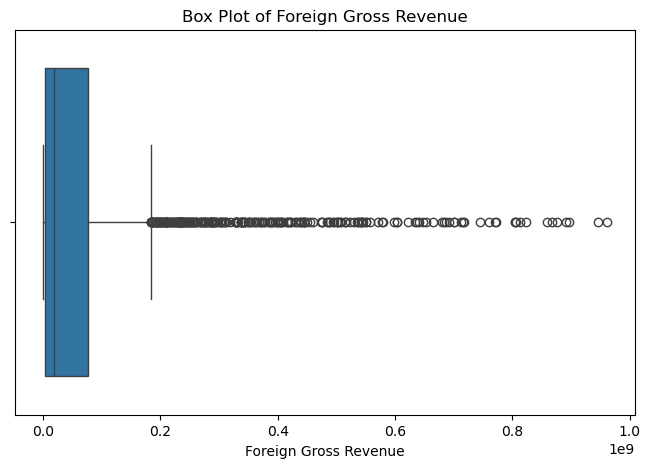

In [ ]:
# Box-plot to show outliers in foreign_gross

df = pd.read_csv('Data/bom.movie_gross(cleaned).csv')

plt.figure(figsize=(8,5))
sns.boxplot(x=df['foreign_gross'])
plt.title("Box Plot of Foreign Gross Revenue")
plt.xlabel("Foreign Gross Revenue")

plt.savefig('visuals/foreign_gross_boxplot.png')
plt.show()



*   Most Films do not perfom well overseas.

*   International success is not evenly distributed.

* Invest in fewer,bigger films with international appeal rather than many small ones.



In [ ]:
cols = ['domestic_gross','foreign_gross','net_gross']

for col in cols:
    print(col)
    print("Skew:", skew(df[col].dropna()))
    print("Kurtosis:", kurtosis(df[col].dropna()))
    print("---")


domestic_gross
Skew: 3.7091956892429345
Kurtosis: 20.329185706835336
---
foreign_gross
Skew: 3.0701974178134774
Kurtosis: 10.687705061520475
---
net_gross
Skew: 2.9994078960354407
Kurtosis: 10.357110399458993
---


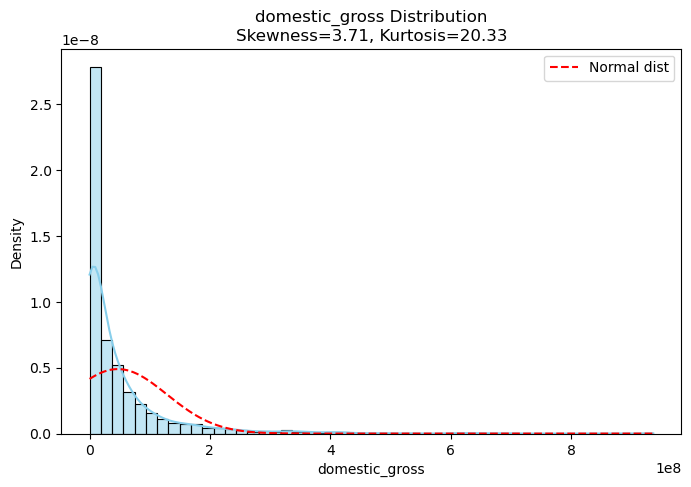

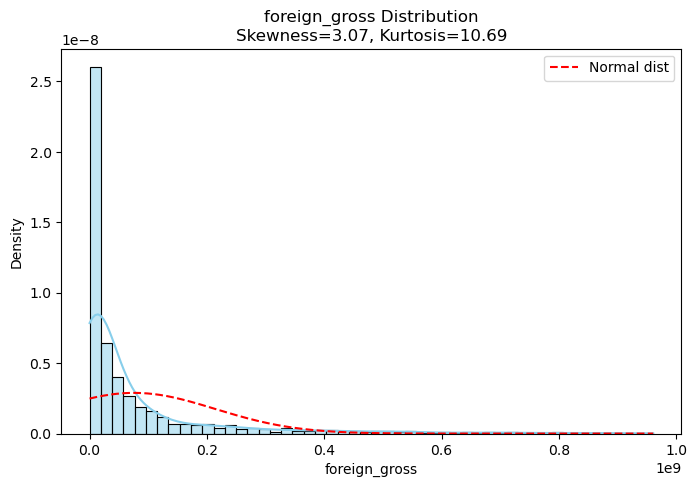

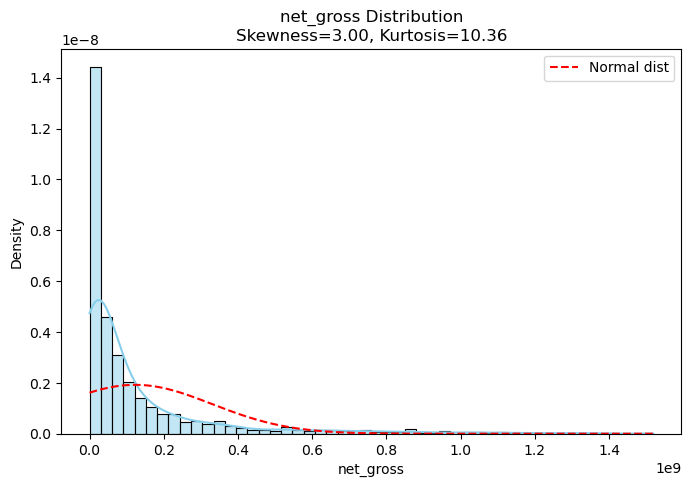

In [ ]:
# Compute skew and kurtosis

cols = ['domestic_gross', 'foreign_gross', 'net_gross']

# Clean numeric columns (remove $, commas if needed)
for col in cols:
    df[col] = df[col].replace('[\$,]', '', regex=True)
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_clean = df[cols].dropna()

for col in cols:
    data = df_clean[col]

    s = skew(data)
    k = kurtosis(data)

    # Plot histogram + density + normal overlay
    plt.figure(figsize=(8,5))
    sns.histplot(data, bins=50, kde=True, color='skyblue', stat='density')

    # Overlay normal distribution for comparison
    x = np.linspace(data.min(), data.max(), 1000)
    plt.plot(x, norm.pdf(x, data.mean(), data.std()), color='red', linestyle='--', label='Normal dist')

    plt.title(f'{col} Distribution\nSkewness={s:.2f}, Kurtosis={k:.2f}')
    plt.xlabel(col)
    plt.ylabel('Density')
    plt.legend()

    plt.savefig(f'visuals/{col}_distribution.png')
    plt.show()

# Skewness


* All three variables are strongly right skewed.

   * Most movies earn low to moderate revenue.
   * A small number of films earn extremely high revenue.
   * The long right tail is caused by blockbusters.

# Kurtosis


* Distributions have fat tails.
* Extreme values occur much more often than in a normal distribution.
* A few movies dominate total revenue.

**Domestic revenue is the most extreme it has highest skew and kurtosis**
   * This suggests that:
   
1.   Domestic box office is more hit driven than the foreign box office.

2.   A few mega-hits massively outperfom everything elsee.

__

From a studio strategy perspective:

* Revenue success is not evenly distributed.

* Profitability depends on rare breakout hits.

* Average Values are misleading.


This supports decisions like:

* Focus on high impact-impact films.

* Prioritising sequels and globally applealing genres.

* Avoid decsions based only on mean revenue.





    



In [ ]:
 # Frequency Table

bins = [0, 10e6, 50e6, 100e6, 500e6, 1e9]
labels = ['0-10M', '10-50M', '50-100M', '100-500M', '500M+']
df['domestic_bin'] = pd.cut(df['domestic_gross'], bins=bins, labels=labels)
df['domestic_bin'].value_counts().sort_index()

domestic_bin
0-10M       893
10-50M      549
50-100M     283
100-500M    275
500M+         9
Name: count, dtype: int64

C:\Users\compweb\AppData\Local\Temp\ipykernel_10196\1938524920.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=bin_counts.index, y=bin_counts.values, palette='viridis')


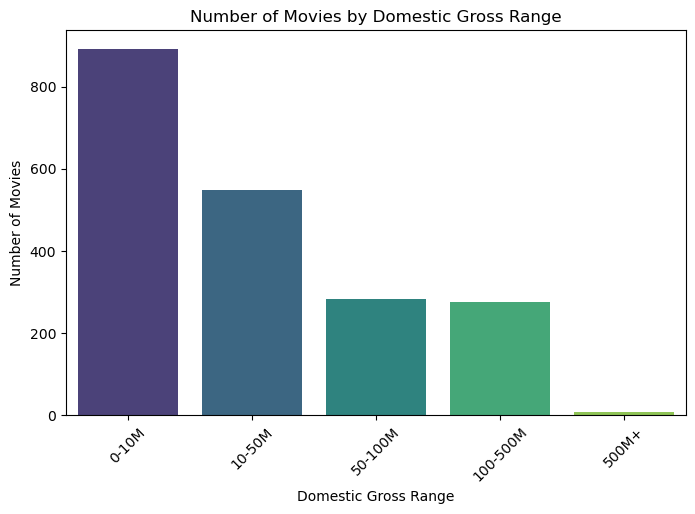

In [ ]:
import os

# Count the number of movies in each bin
bin_counts = df['domestic_bin'].value_counts().sort_index()

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=bin_counts.index, y=bin_counts.values, palette='viridis')
plt.title("Number of Movies by Domestic Gross Range")
plt.xlabel("Domestic Gross Range")
plt.ylabel("Number of Movies")
plt.xticks(rotation=45)


# Create the 'visuals' directory if it doesn't exist
os.makedirs('visuals', exist_ok=True)
plt.savefig('visuals/movies_by_domestic_gross_range.png')
plt.show()

* Most of the movies gross below 50 million
* The Domestic gross range is between 0 - 10 Million   

### VISUALIZATION

In [ ]:
bom_df = pd.read_csv('Data/bom.movie_gross(cleaned).csv')
tmdb_df = pd.read_csv('Data/tmdb.movies_cleaned.csv')
tm_budget_df  = pd.read_csv('Data/tn.movie_budgets.csv')
#imdb_df = pd.read_sql('SELECT * FROM imdb_movies', con=sqlite3.connect('Data/im.db'))


In [ ]:
bom_df

,title,studio,domestic_gross,foreign_gross,year,net_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
2004,I Still See You,LGF,1400.0,1500000.0,2018,1.501400e+06
2005,The Catcher Was a Spy,IFC,725000.0,229000.0,2018,9.540000e+05
2006,Time Freak,Grindstone,10000.0,256000.0,2018,2.660000e+05
2007,Reign of Judges: Title of Liberty - Concept Short,Darin Southa,93200.0,5200.0,2018,9.840000e+04


In [ ]:
bom_filtered  =  bom_df[bom_df['domestic_gross'] > 100000000]
bom_filtered

,title,studio,domestic_gross,foreign_gross,year,net_gross
0,Toy Story 3,BV,415000000.0,652000000.0,2010,1.067000e+09
1,Alice in Wonderland (2010),BV,334200000.0,691300000.0,2010,1.025500e+09
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000.0,2010,9.603000e+08
3,Inception,WB,292600000.0,535700000.0,2010,8.283000e+08
4,Shrek Forever After,P/DW,238700000.0,513900000.0,2010,7.526000e+08
...,...,...,...,...,...,...
1873,Crazy Rich Asians,WB,174500000.0,64000000.0,2018,2.385000e+08
1876,Creed II,MGM,115700000.0,98300000.0,2018,2.140000e+08
1878,The Equalizer 2,Sony,102100000.0,88300000.0,2018,1.904000e+08
1880,The Mule,WB,103800000.0,68700000.0,2018,1.725000e+08


#### Top movies by net gross


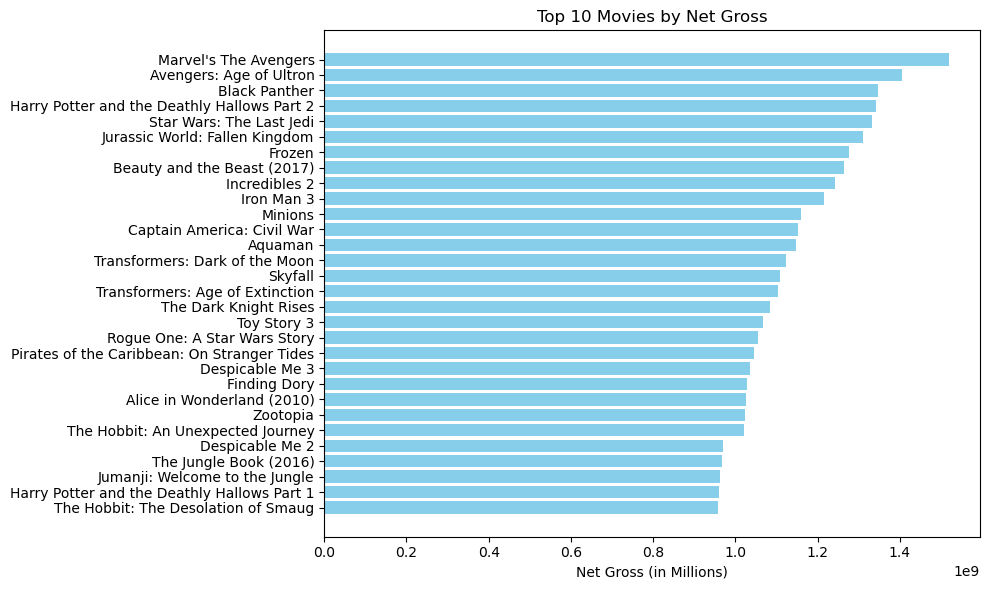

In [ ]:
plt.figure(figsize=(10, 6))
top_10 = bom_filtered.sort_values(by='net_gross', ascending=False).head(30)
plt.barh(top_10['title'][::-1], top_10['net_gross'][::-1], color='skyblue')
plt.xlabel('Net Gross (in Millions)')
plt.title('Top 10 Movies by Net Gross')
plt.tight_layout()
plt.savefig('visuals/top_10_movies_net_gross.png')

#### TOTAL NET GROSS TREND OVER THE YEARS

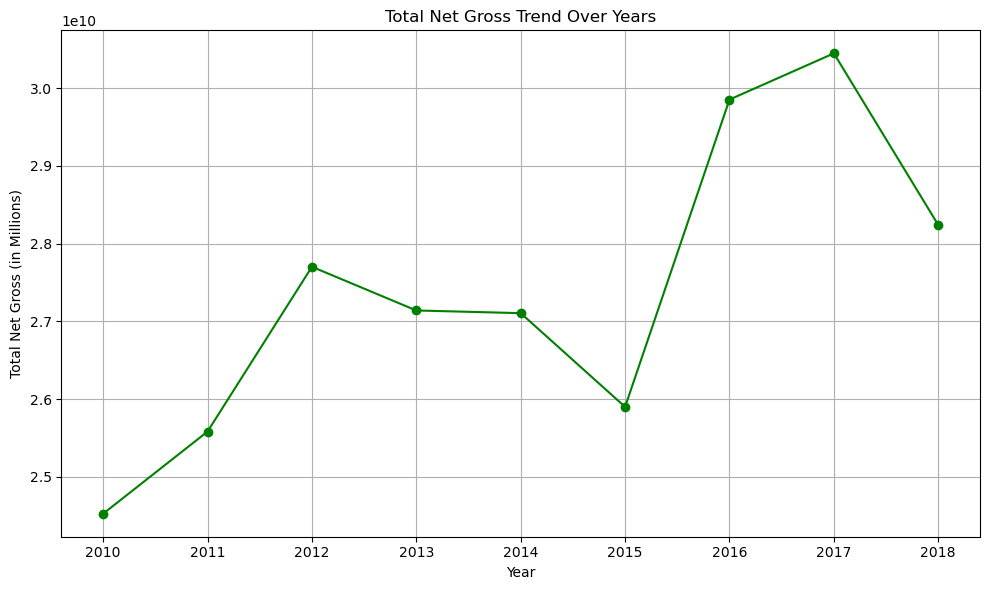

In [ ]:
plt.figure(figsize=(10, 6))
yearly_gross = bom_df.groupby('year')['net_gross'].sum().sort_index()
plt.plot(yearly_gross.index, yearly_gross.values, marker='o', linestyle='-', color='green')
plt.xlabel('Year')
plt.ylabel('Total Net Gross (in Millions)')
plt.title('Total Net Gross Trend Over Years')
plt.grid(True)
plt.tight_layout()
plt.savefig('visuals/total_net_gross_trend.png')

* Net gros over the years has been non stationary but in recent times it has had an increase.

* Movie market is structurally growing,making long term investment in production financially justified.


#### STUDIO COMPARISON (DOMESTIC AND  FOREIGN GROSS EARNINGS) OVER THe YEARS

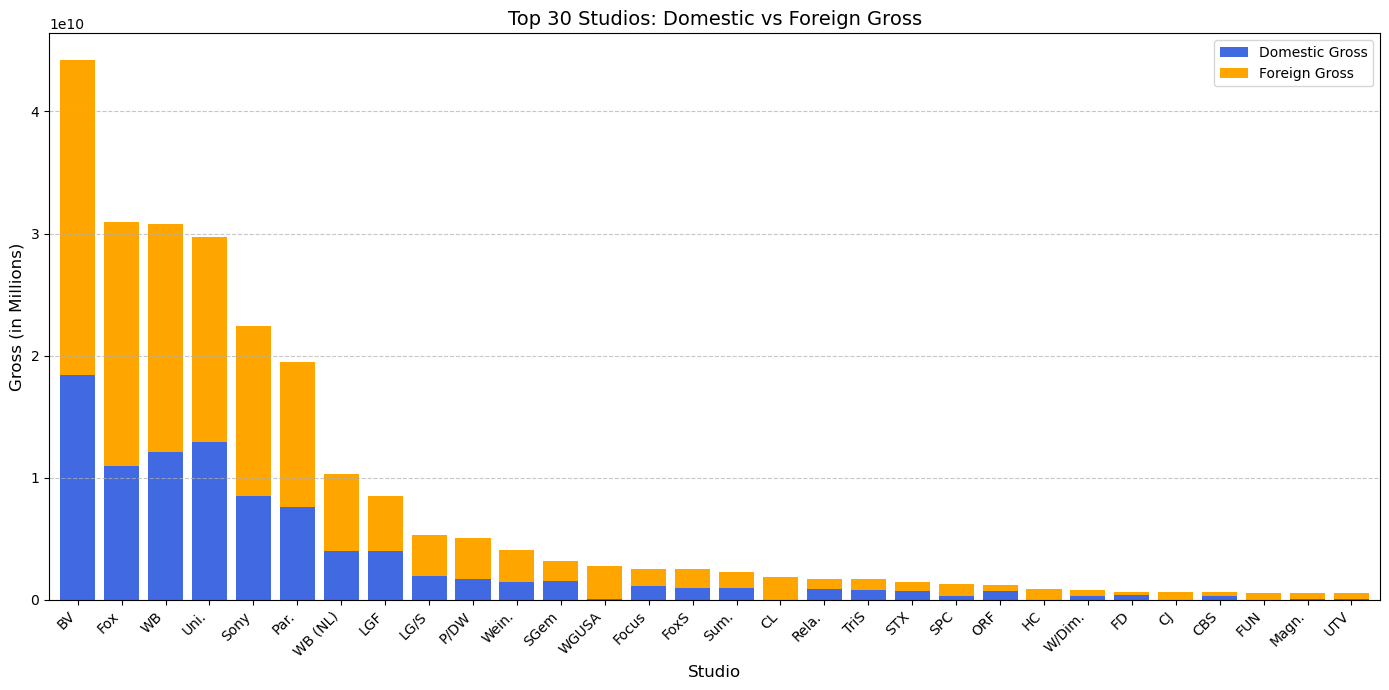

In [ ]:
studio_gross = bom_df.groupby('studio')[['domestic_gross', 'foreign_gross', 'net_gross']].sum()
studio_gross = studio_gross.sort_values(by='net_gross', ascending=False).head(30)

ax = studio_gross[['domestic_gross', 'foreign_gross']].plot(
    kind='bar',
    stacked=True,
    figsize=(14, 7),
    width=0.8,
    color=['royalblue', 'orange']
)

plt.xlabel('Studio', fontsize=12)
plt.ylabel('Gross (in Millions)', fontsize=12)
plt.title('Top 30 Studios: Domestic vs Foreign Gross', fontsize=14)
plt.legend(['Domestic Gross', 'Foreign Gross'])
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('visuals/studio_comparison.png')


In [ ]:
tmdb_df

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,genres
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,Adventure
1,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,Fantasy
2,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,Family
3,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,Fantasy
4,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,Adventure
...,...,...,...,...,...,...,...,...,...,...,...
47829,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,Family
47830,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,Adventure
47831,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1,2018,Action
47832,"[53, 27]",309885,en,The Church,0.600,2018-10-05,The Church,0.0,1,2018,Thriller


In [ ]:
tmdb_filtered_df = tmdb_df[tmdb_df['vote_average'] >= 5]
tmdb = tmdb_filtered_df
tmdb

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,release_year,genres
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,Adventure
1,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,Fantasy
2,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788,2010,Family
3,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,Fantasy
4,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,2010,Adventure
...,...,...,...,...,...,...,...,...,...,...,...
47748,"[36, 99, 18]",458823,en,Acorn and the Firestorm,0.600,2018-04-06,Acorn and the Firestorm,5.0,1,2018,Other
47749,"[36, 99, 18]",458823,en,Acorn and the Firestorm,0.600,2018-04-06,Acorn and the Firestorm,5.0,1,2018,Drama
47750,[99],448912,fr,Maison du bonheur,0.600,2018-08-24,Maison du bonheur,5.0,1,2018,Other
47751,[99],406486,en,Boy Howdy! The Story of CREEM Magazine,0.600,2018-10-01,Boy Howdy! The Story of CREEM Magazine,5.0,1,2018,Other


#### MOVIE GENRE BY AVERAGE POPULARITY

C:\Users\compweb\AppData\Local\Temp\ipykernel_10196\4097670110.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')


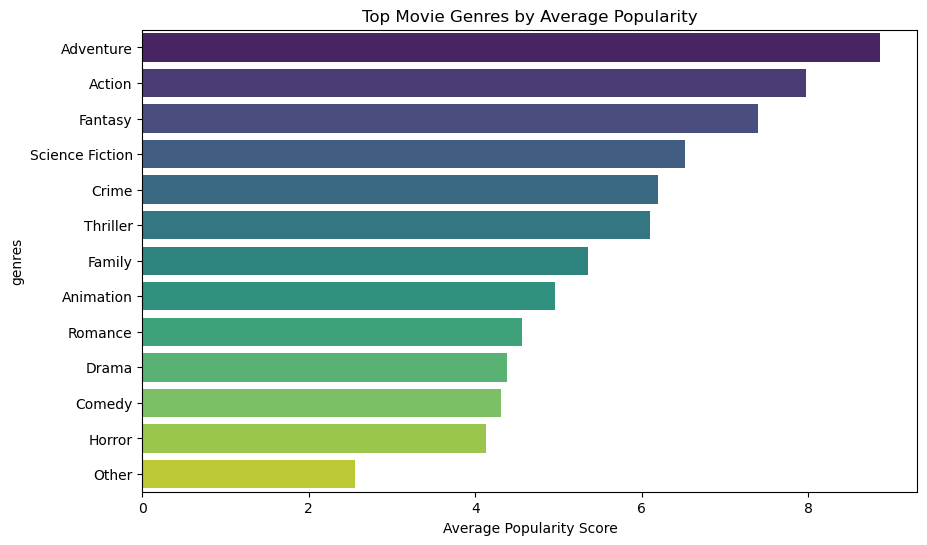

In [ ]:
plt.figure(figsize=(10, 6))
top_genres = tmdb.groupby('genres')['popularity'].mean().sort_values(ascending=False).head(20)
sns.barplot(x=top_genres.values, y=top_genres.index, palette='viridis')
plt.title('Top Movie Genres by Average Popularity')
plt.xlabel('Average Popularity Score')
plt.ylabel

plt.savefig('visuals/top_genres_popularity.png')
plt.show()

* Average popularity score was 5 while soe movies go beyond 7

#### MOVIE POPULARITY VS RATINGS

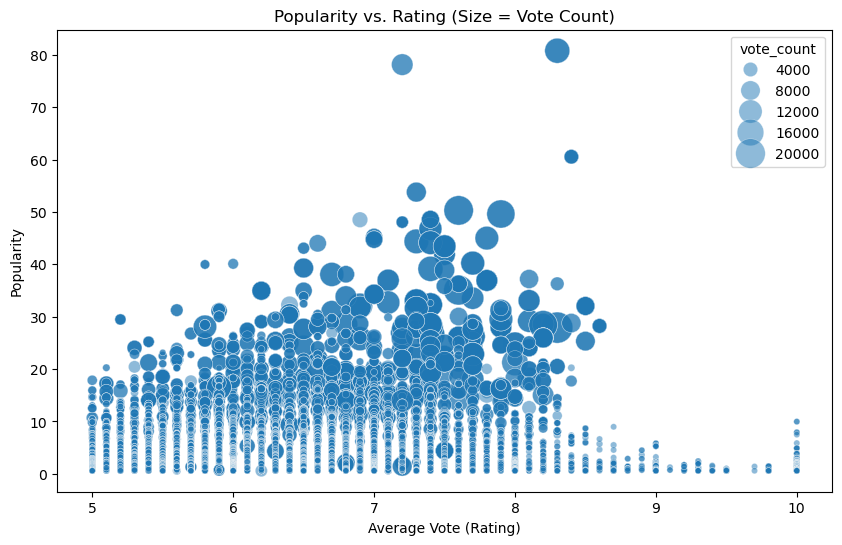

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tmdb, x='vote_average', y='popularity',
                size='vote_count', alpha=0.5, sizes=(20, 500))
plt.title('Popularity vs. Rating (Size = Vote Count)')
plt.xlabel('Average Vote (Rating)')
plt.ylabel('Popularity')

plt.savefig('visuals/popularity_vs_rating.png')
plt.show()



*   Most movies cluster between ratings 6-8 regadrdless of popularity.

#### YEARLY RELEASE TREND

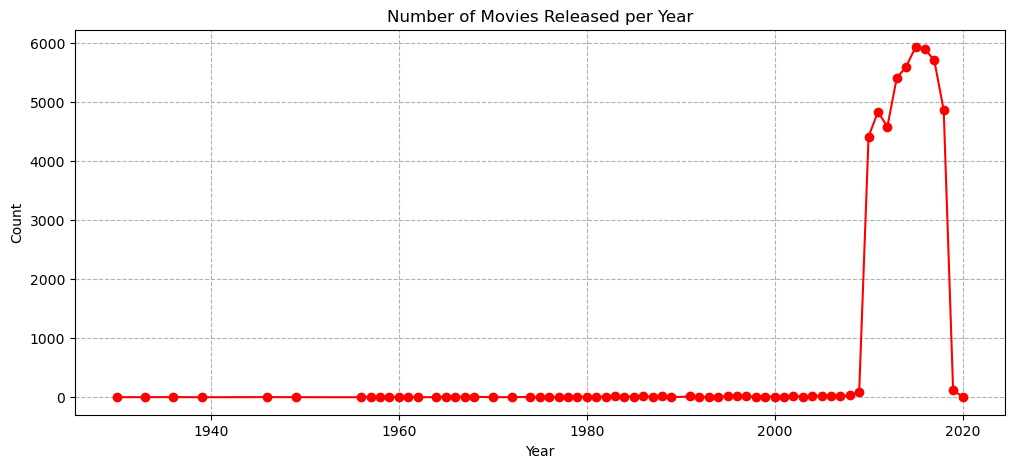

In [ ]:
plt.figure(figsize=(12, 5))
yearly_counts = tmdb_df['release_year'].value_counts().sort_index()
plt.plot(yearly_counts.index, yearly_counts.values, marker='o', color='red')
plt.title('Number of Movies Released per Year')
plt.xlabel('Year')
plt.ylabel('Count')
plt.grid(True, linestyle='--')
plt.show()



*   The peak in movie production is likely due to digital filmmaking,streamimg platforms and global content creation.



#### DISTRIBUTION OF MOVIE RATINGS

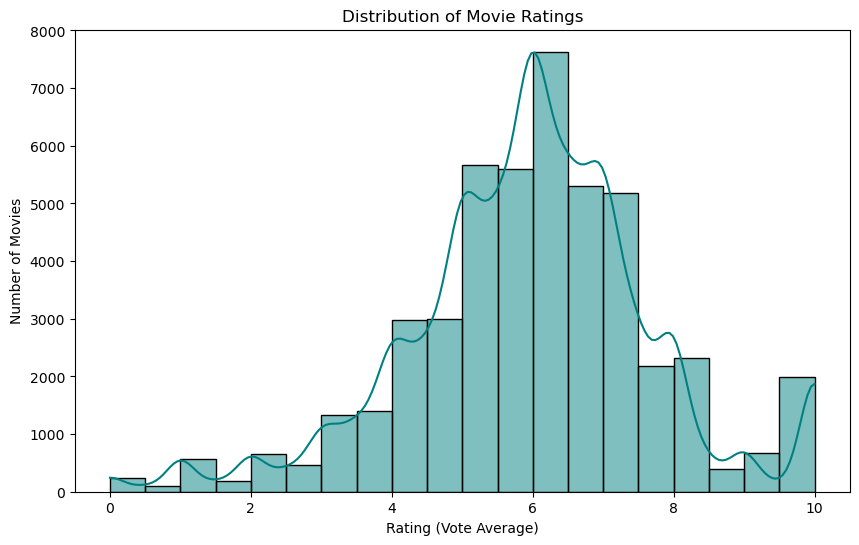

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(tmdb_df['vote_average'], bins=20, kde=True, color='teal')
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating (Vote Average)')
plt.ylabel('Number of Movies')

plt.savefig('visuals/movie_ratings_distribution.png')
plt.show()

* Average vote is 6

#### Average Rating by Language (Top 10 most frequent languages)

C:\Users\compweb\AppData\Local\Temp\ipykernel_10196\2943252253.py:25: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtered_df[['language_full']] = filtered_df[['original_language']].applymap(map_language)
C:\Users\compweb\AppData\Local\Temp\ipykernel_10196\2943252253.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=filtered_df, x='language_full', y='vote_average', estimator='mean', palette='magma')


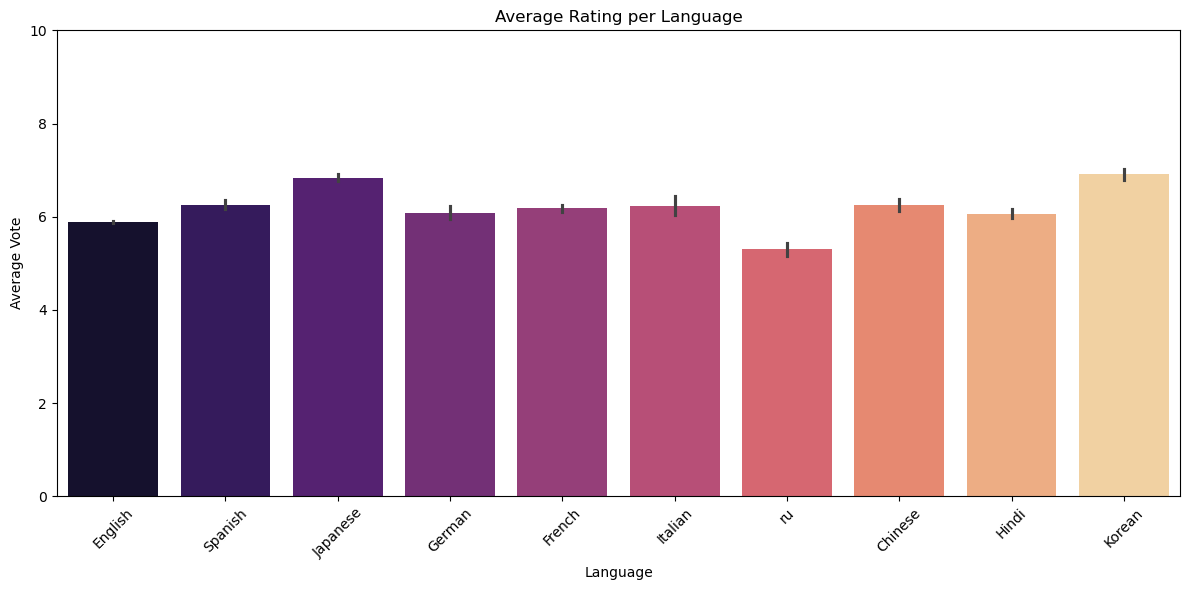

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [ ]:
# Define the language mapping dictionary
language_map = {
    'en': 'English',
    'fr': 'French',
    'es': 'Spanish',
    'ja': 'Japanese',
    'zh': 'Chinese',
    'ko': 'Korean',
    'de': 'German',
    'it': 'Italian',
    'hi': 'Hindi',
    'pt': 'Portuguese',
    # Add more as needed
}

# Function to map codes to full names
def map_language(code):
    return language_map.get(code, code)

# Filter top 10 languages
top_langs = tmdb_df['original_language'].value_counts().head(10).index
filtered_df = tmdb_df[tmdb_df['original_language'].isin(top_langs)].copy()

# Use applymap on a single-column DataFrame
filtered_df[['language_full']] = filtered_df[['original_language']].applymap(map_language)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_df, x='language_full', y='vote_average', estimator='mean', palette='magma')
plt.title('Average Rating per Language')
plt.ylim(0, 10)
plt.ylabel('Average Vote')
plt.xlabel('Language')
plt.xticks(rotation=45)
plt.tight_layout()

plt.savefig('visuals/average_rating_per_language.png')
plt.show()
plt.figure(figsize=(12, 6))




*   Differnces between languages are modest,suggesting broadly similar audience reception across langauges.




#### ENGAGEMENT CORRELATION (POPULATION VS  VOTECOUNT )

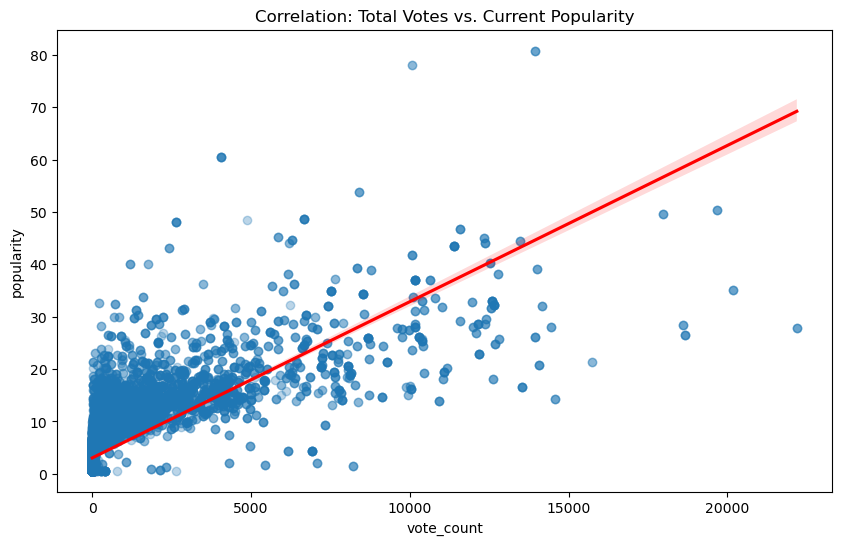

In [ ]:

plt.figure(figsize=(10, 6))
sns.regplot(data=tmdb_df, x='vote_count', y='popularity', scatter_kws={'alpha':0.3}, line_kws={'color':'red'})
plt.title('Correlation: Total Votes vs. Current Popularity')

plt.savefig('visuals/total_votes_vs_popularity.png')
plt.show()

#### CLEANING THE TN.MOVIES_BUDGETS.CSV
 * CONVERTING THE NUMERICALS TO INTEGERS
 * ADDED A NEW COLUMN PROFITS

In [ ]:
tm_budget_df

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


* ENSURED MONTH AND RELEASE DATE ARE IN THEIR CORRECT FORMATS

In [ ]:
tm_budget_df['release_date'] = pd.to_datetime(tm_budget_df['release_date'])
tm_budget_df['month'] = tm_budget_df['release_date'].dt.month_name()

In [ ]:
tm_budget_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   id                 5782 non-null   int64         
 1   release_date       5782 non-null   datetime64[ns]
 2   movie              5782 non-null   object        
 3   production_budget  5782 non-null   object        
 4   domestic_gross     5782 non-null   object        
 5   worldwide_gross    5782 non-null   object        
 6   month              5782 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(5)
memory usage: 316.3+ KB


In [ ]:
tm_budget_df.value_counts()

id   release_date  movie            production_budget  domestic_gross  worldwide_gross  month   
1    1959-07-18    The Nun's Story  $3,500,000         $12,800,000     $12,800,000      July        1
67   2009-12-04    Paa              $4,300,000         $199,228        $9,791,282       December    1
     2008-10-24    Pride and Glory  $30,000,000        $15,740,721     $43,440,721      October     1
     2008-07-03    The Wackness     $6,000,000         $2,077,046      $3,330,012       July        1
     2007-08-17    The Last Legion  $67,000,000        $5,932,060      $25,357,771      August      1
                                                                                                   ..
34   2000-05-12    Hamlet           $2,000,000         $1,577,287      $2,419,669       May         1
     1996-11-01    The Funeral      $12,500,000        $1,212,799      $1,412,799       November    1
     1996-10-11    Trees Lounge     $1,300,000         $749,741        $749,741        

In [ ]:

#  Created a list of the columns that need cleaning
money_cols = ['worldwide_gross', 'production_budget', 'domestic_gross']

# 2. Strip '$' and ',', then convert to int
for col in money_cols:
    tm_budget_df[col] = tm_budget_df[col].str.replace('$', '').str.replace(',', '').astype(int)

# 3. Now you can safely calculate Profit
tm_budget_df["Profit"] = tm_budget_df["worldwide_gross"] - tm_budget_df["production_budget"]

# Display the results
tm_budget_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,month,Profit
0,1,2009-12-18,Avatar,425000000,760507625,2776345279,December,2351345279
1,2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,May,635063875
2,3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,June,-200237650
3,4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,May,1072413963
4,5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,December,999721747


#### MOVIE BUDGETTED AMOUNT VS THE PROFITS GAINED

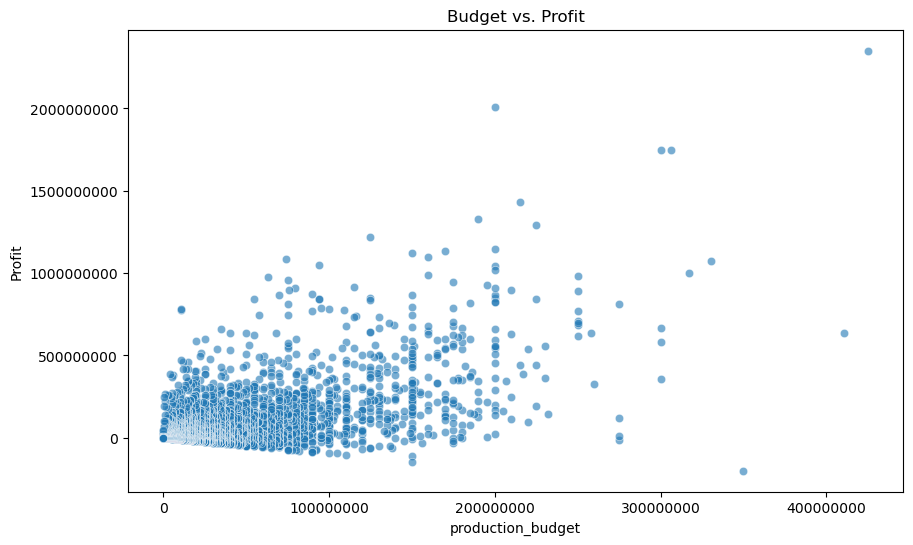

In [ ]:
# 1.
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tm_budget_df, x='production_budget', y='Profit', alpha=0.6)
plt.title('Budget vs. Profit')
plt.ticklabel_format(style='plain', axis='both')

plt.savefig('visuals/budget_vs_profit.png')
plt.show()



*   As production cost increases,profit tends to increase

*  However,the relationship is not strong points are widely scattered.



#### TOP 20 MOVIES BY RETURN ON INVESTMENT

C:\Users\compweb\AppData\Local\Temp\ipykernel_10196\2655019425.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_roi, x='ROI', y='movie', palette='Greens_r')


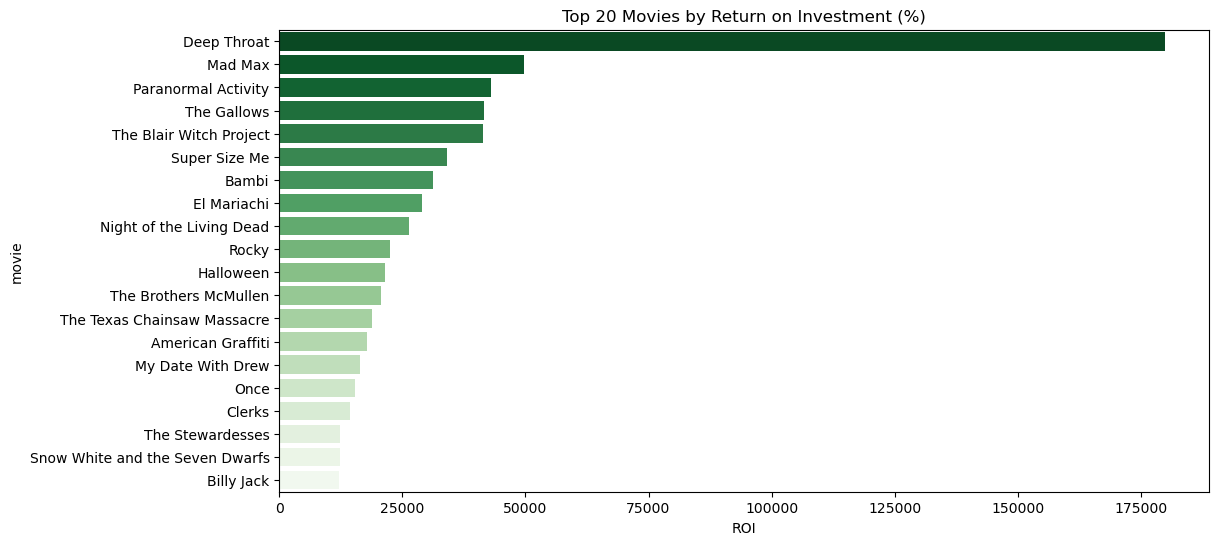

In [ ]:
tm_budget_df['ROI'] = (tm_budget_df['Profit'] / tm_budget_df['production_budget']) * 100

top_roi = tm_budget_df.sort_values(by='ROI', ascending=False).head(20)

plt.figure(figsize=(12, 6))
sns.barplot(data=top_roi, x='ROI', y='movie', palette='Greens_r')
plt.title('Top 20 Movies by Return on Investment (%)')

plt.savefig('visuals/top_20_movies_roi.png')
plt.show()

* return on investment is around 50000

#### Seasonal Profitability (Average Profit by Release Month)

C:\Users\compweb\AppData\Local\Temp\ipykernel_10196\1993957378.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tm_budget_df, x='month', y='Profit', order=month_order, palette='rocket')


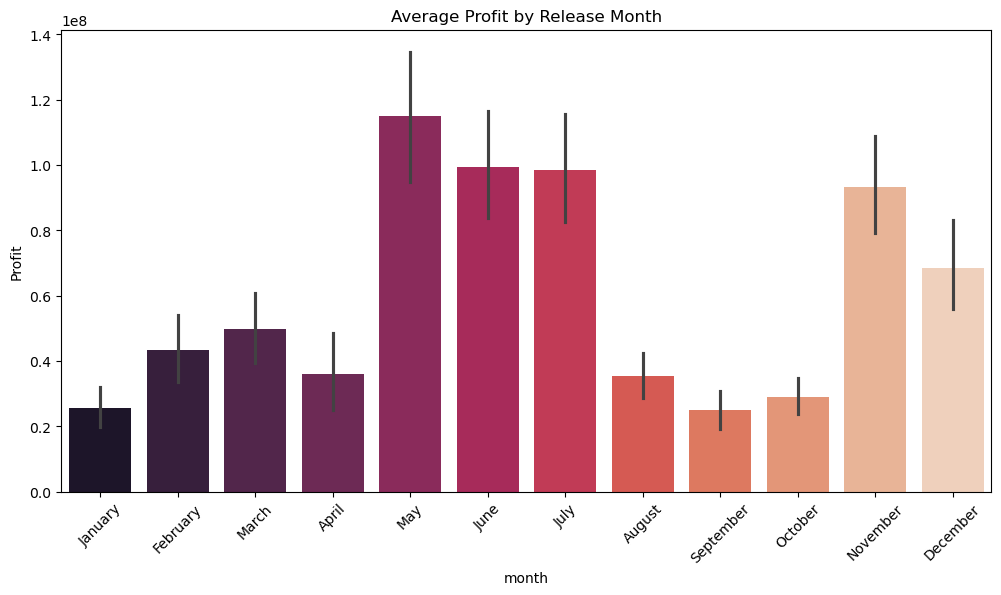

In [ ]:

month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

plt.figure(figsize=(12, 6))
sns.barplot(data=tm_budget_df, x='month', y='Profit', order=month_order, palette='rocket')
plt.xticks(rotation=45)
plt.title('Average Profit by Release Month')

plt.savefig('visuals/average_profit_by_month.png')
plt.show()


#### DOMESTIC VS FOREIGN MARKET SHARES

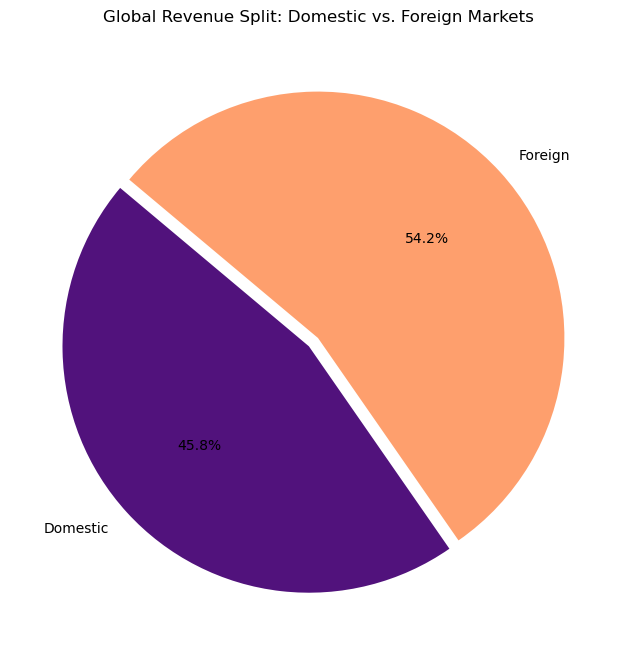

In [ ]:
# 3. Visual: Domestic vs. Foreign Market Share
market_totals = [tm_budget_df['domestic_gross'].sum(),
                 (tm_budget_df['worldwide_gross'] - tm_budget_df['domestic_gross']).sum()]

plt.figure(figsize=(8, 8))
plt.pie(market_totals, labels=['Domestic', 'Foreign'], autopct='%1.1f%%',
        colors=['#51127c', '#fe9f6d'], startangle=140, explode=[0.05, 0])
plt.title('Global Revenue Split: Domestic vs. Foreign Markets')

plt.savefig('visuals/global_revenue_split.png')
plt.show()

* Foreign returns are dominating the film industry

#### AVERAGE PROFIT BY BUDGET CATEGORY

In [ ]:
bins = [0, 5e6, 20e6, 50e6, 100e6, float('inf')]
labels = ['Micro (<$5M)', 'Low ($5-20M)', 'Mid ($20-50M)', 'High ($50-100M)', 'Blockbuster ($100M+)']
tm_budget_df['budget_tier'] = pd.cut(tm_budget_df['production_budget'], bins=bins, labels=labels)

C:\Users\compweb\AppData\Local\Temp\ipykernel_10196\1727818321.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=tm_budget_df, x='budget_tier', y='Profit', palette='magma')


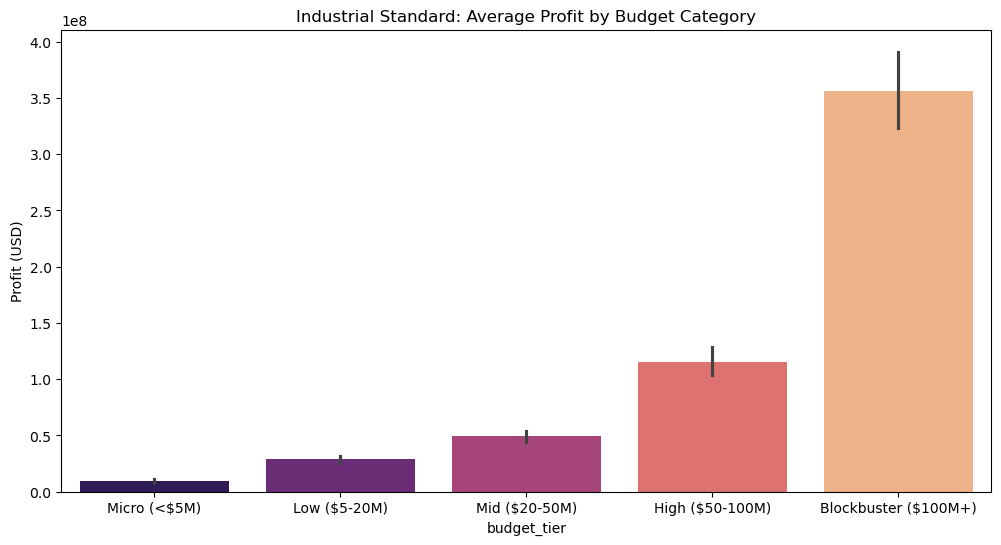

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=tm_budget_df, x='budget_tier', y='Profit', palette='magma')
plt.title('Industrial Standard: Average Profit by Budget Category')
plt.ylabel('Profit (USD)')

plt.savefig('visuals/average_profit_by_budget_category.png')
plt.show()

* Block buster movies sell more and have higher returns

In [ ]:
db_path = "Data/im.db" # ← use the extracted path
conn = sqlite3.connect(db_path)
cursor =conn.cursor()

imdb_tbls =[ pd.read_sql("""
SELECT name
FROM sqlite_master
WHERE type = 'table';
""", conn)]

imdb_tbls



[            name
 0   movie_basics
 1      directors
 2      known_for
 3     movie_akas
 4  movie_ratings
 5        persons
 6     principals
 7        writers]

# Top Movie Directors Against Average Rating

This maps the top 10 directors with highest average rating and most votes.

In [ ]:
ar_df = pd.read_sql("""
SELECT
    p.primary_name AS director_name,
    AVG(r.averageRating) AS avg_rating,
    COUNT(r.numVotes) AS total_votes -- Optional: include vote count for relevance
FROM
    persons p
JOIN
    directors d ON p.person_id = d.person_id
JOIN
    movie_basics mb ON d.movie_id = mb.movie_id
JOIN
    movie_ratings r ON mb.movie_id = r.movie_id
GROUP BY
    p.person_id, p.primary_name
ORDER BY
    (AVG(r.averageRating)+COUNT(r.numVotes)) DESC
LIMIT 10;
""",conn)
ar_df

,director_name,avg_rating,total_votes
0,Shane Ryan,5.626452,155
1,Ruben Rodriguez,6.079845,129
2,Tony Newton,4.785385,130
3,Corey Norman,6.017757,107
4,Jason Impey,5.158824,102
5,Evan Marlowe,6.403000,100
6,James Cullen Bressack,4.601020,98
7,Patrick Rea,6.153933,89
8,Sergey A.,7.129630,81
9,Gav Chuckie Steel,6.558025,81


In [ ]:

colours = plt.cm.RdYlBu(ar_df['avg_rating']/ar_df['avg_rating'].max())
ax = ar_df.plot(x='director_name', y='avg_rating', kind='bar', figsize=(10, 6), legend=False,color=colours)

# Add title and labels
plt.title('Top 10 Directors by Average Rating')
plt.xlabel('Director Name')
plt.ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure the layout is clean
plt.tight_layout()
plt.savefig('visuals/top_10_director_average_rating.png')
# Display the plot
plt.show()

KeyError: 'director_name'

# Top Actors / Actress Against Average Rating

# The top 10 actors against average rating

In [ ]:
ac_df = pd.read_sql("""
SELECT
    p.primary_name AS actor_name,
    AVG(r.averageRating) AS avg_rating,
    COUNT(r.numVotes) AS total_votes
FROM
    persons p
JOIN
    principals pr ON p.person_id = pr.person_id
JOIN
    movie_basics mb ON pr.movie_id = mb.movie_id
JOIN
    movie_ratings r ON mb.movie_id = r.movie_id
WHERE
    pr.category IN ('actor')
GROUP BY
    p.person_id, p.primary_name
ORDER BY
    (AVG(r.averageRating)+COUNT(r.numVotes)) DESC
LIMIT 10;
""",conn)

ac_df

,actor_name,avg_rating,total_votes
0,Eric Roberts,4.739286,112
1,Prakash Raj,6.026866,67
2,Tom Sizemore,4.947368,57
3,Danny Trejo,4.685714,56
4,Michael Madsen,4.692453,53
5,Brahmanandam,5.896000,50
6,James Franco,5.691667,48
7,Sergey A.,6.271739,46
8,Kunchacko Boban,5.462791,43
9,Asif Ali,5.648718,39


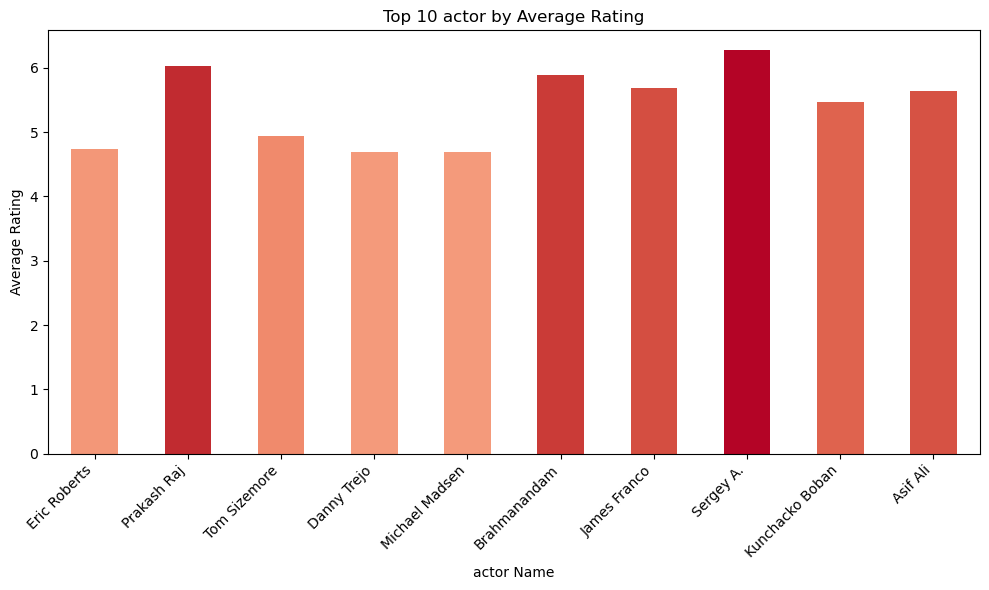

In [ ]:

# Create the bar plot
colours = plt.cm.coolwarm(ac_df['avg_rating']/ac_df['avg_rating'].max())
ax = ac_df.plot(x='actor_name', y='avg_rating', kind='bar', figsize=(10, 6), legend=False,color=colours)

# Add title and labels
plt.title('Top 10 actor by Average Rating')
plt.xlabel('actor Name')
plt.ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure the layout is clean
plt.tight_layout()

plt.savefig('visuals/top_10_actor_average_rating.png')
# Display the plot
plt.show()

# The top 10 actresses against rating

In [ ]:
ar_df = pd.read_sql("""
SELECT
    p.primary_name AS actress_name,
    AVG(r.averageRating) AS avg_rating,
    COUNT(r.numVotes) AS total_votes
FROM
    persons p
JOIN
    principals pr ON p.person_id = pr.person_id
JOIN
    movie_basics mb ON pr.movie_id = mb.movie_id
JOIN
    movie_ratings r ON mb.movie_id = r.movie_id
WHERE
    pr.category IN ('actress')
GROUP BY
    p.person_id, p.primary_name
ORDER BY
    (AVG(r.averageRating)+COUNT(r.numVotes)) DESC
LIMIT 10;
""",conn)

ar_df

,actress_name,avg_rating,total_votes
0,Samantha Ruth Prabhu,6.637143,35
1,Tamannaah Bhatia,5.471429,35
2,Nayanthara,6.170968,31
3,Kajal Aggarwal,6.067742,31
4,Vivica A. Fox,4.931250,32
5,Isabelle Huppert,6.110714,28
6,Radhika Apte,6.362963,27
7,Taapsee Pannu,6.262963,27
8,Rituparna Sengupta,6.133333,27
9,Debbie Rochon,4.603571,28


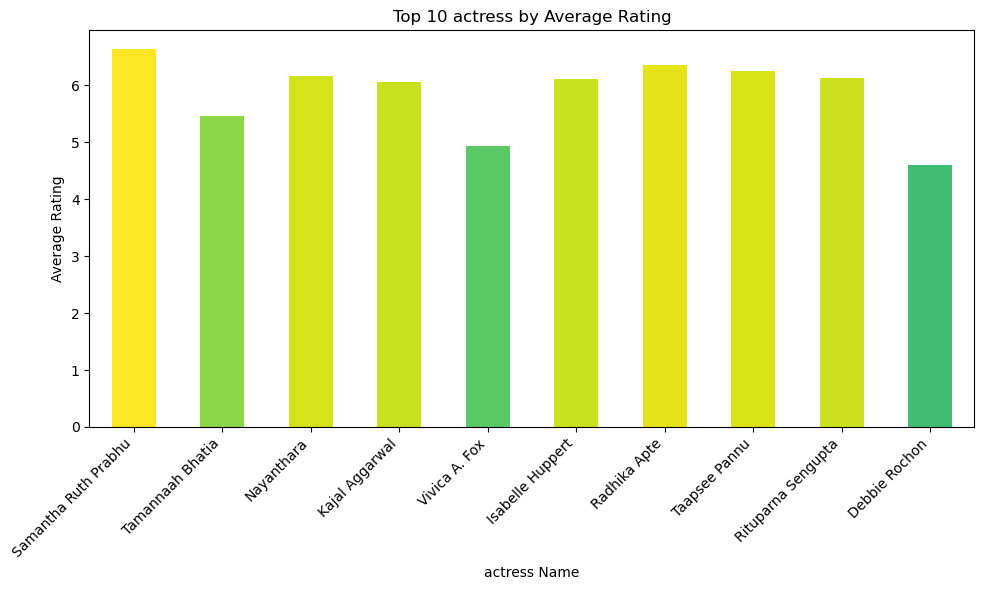

In [ ]:

# Create the bar plot
colours = plt.cm.viridis(ar_df['avg_rating']/ar_df['avg_rating'].max())
ax = ar_df.plot(x='actress_name', y='avg_rating', kind='bar', figsize=(10, 6), legend=False,color=colours)

# Add title and labels
plt.title('Top 10 actress by Average Rating')
plt.xlabel('actress Name')
plt.ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure the layout is clean
plt.tight_layout()

plt.savefig('visuals/top_10_actress_average_rating.png')
# Display the plot
plt.show()

# Top 10 writers against average rating

In [ ]:
wr_df = pd.read_sql("""
SELECT
    p.primary_name AS writer_name,
    AVG(r.averageRating) AS avg_rating,
    COUNT(r.numVotes) AS total_votes
FROM
    persons p
JOIN
    writers w ON p.person_id = w.person_id
JOIN
    movie_basics mb ON w.movie_id = mb.movie_id
JOIN
    movie_ratings r ON mb.movie_id = r.movie_id
GROUP BY
    p.person_id, p.primary_name
ORDER BY
    (AVG(r.averageRating)+COUNT(r.numVotes)) DESC
LIMIT 10
""",conn)

wr_df

,writer_name,avg_rating,total_votes
0,Shane Ryan,5.829864,221
1,Tony Newton,4.676263,198
2,R.J. Wilson,6.564583,144
3,L.M. Harter,6.564583,144
4,Dan Riesser,6.715315,111
5,Nick Mundy,6.731818,110
6,Ryan Ridley,6.731818,110
7,David Seger,6.731818,110
8,Tyler Spiers,6.731818,110
9,Tom Kauffman,6.731818,110


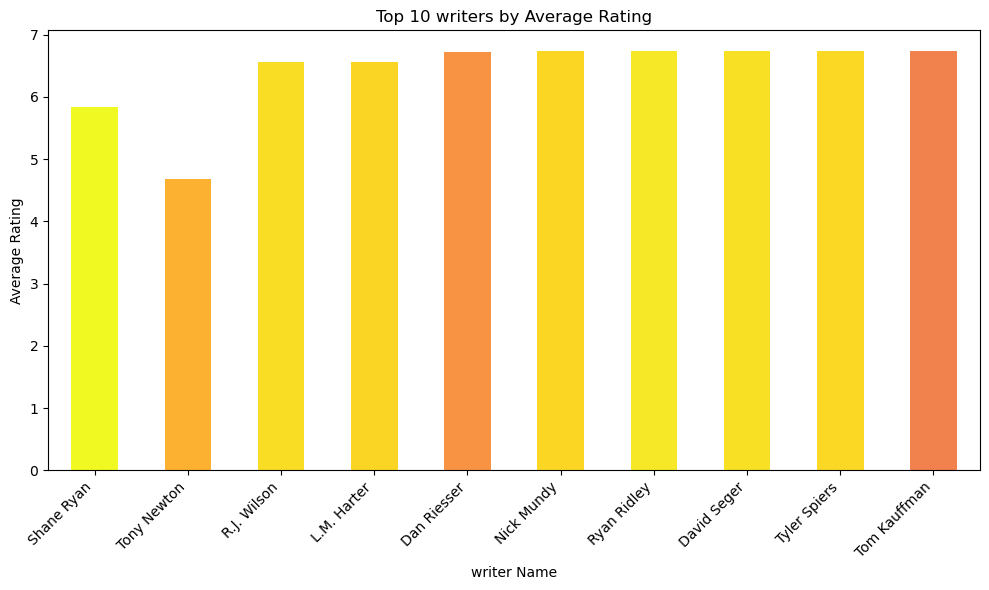

In [ ]:

# Create the bar plot
colours = plt.cm.plasma(ar_df['avg_rating']/ar_df['avg_rating'].max())
ax = wr_df.plot(x='writer_name', y='avg_rating', kind='bar', figsize=(10, 6), legend=False,color=colours)

# Add title and labels
plt.title('Top 10 writers by Average Rating')
plt.xlabel('writer Name')
plt.ylabel('Average Rating')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Ensure the layout is clean
plt.tight_layout()
plt.savefig('visuals/top_10_writer_average_rating.png')

# Display the plot
plt.show()

# A plot of runtime minutes against average rating

In [ ]:
runtime_df = pd.read_sql("""
SELECT
    runtime_minutes AS runtimeMinutes,
    AVG(r.averageRating) AS avg_rating,
    COUNT(r.numVotes) AS total_votes
FROM
    movie_basics mb
JOIN
    movie_ratings r ON mb.movie_id = r.movie_id
GROUP BY
    runtime_minutes
ORDER BY
    avg_rating DESC ,total_votes DESC
LIMIT 10
""", conn)
runtime_df

,runtimeMinutes,avg_rating,total_votes
0,607.0,9.30,1
1,379.0,9.20,1
2,383.0,9.20,1
3,261.0,9.00,1
4,467.0,8.90,1
5,1440.0,8.90,1
6,247.0,8.85,2
7,207.0,8.80,1
8,287.0,8.70,1
9,364.0,8.70,1


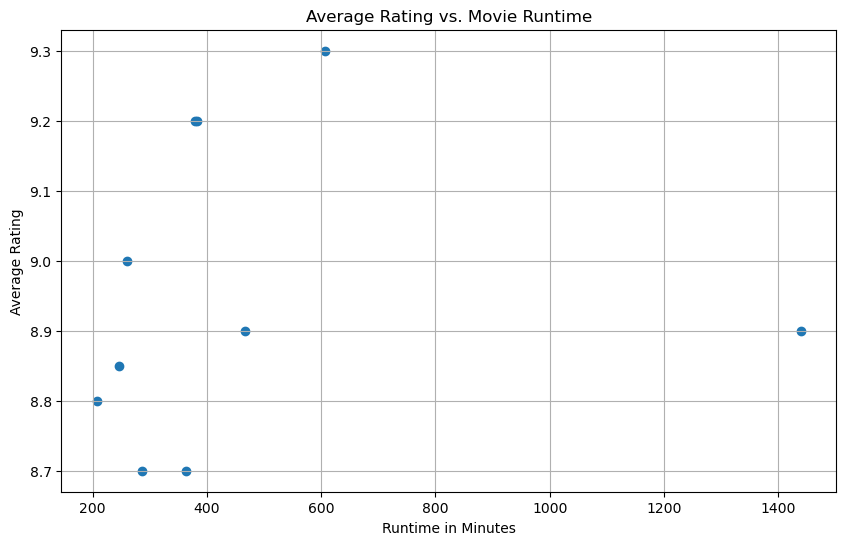

In [ ]:
# Create a scatter plot
plt.figure(figsize=(10, 6)) # Optional: adjust figure size
plt.scatter(runtime_df['runtimeMinutes'], runtime_df['avg_rating'])

# Add labels and a title
plt.xlabel('Runtime in Minutes')
plt.ylabel('Average Rating')
plt.title('Average Rating vs. Movie Runtime')
plt.grid(True) # Optional: add a grid

plt.savefig('visuals/average_rating_vs_runtime.png')
# Display the plot
plt.show()

There is no relationship between movie runtime and average rating

# ***Conclusions***

---





*   Revenue sucess is not evenly distributed.

* Block-buster movies sell more and have higher returns.

*  Foreign revenue mostly dominates the industry.

* Films that were released in the months of summer and winter tend to have higher profit.

* Big budgests does not necessarily gurantee big profit.

* Most movies cluster between ratings 6-8 regadrdless of popularity.

* Action,adventure and fantasy dominate mass appeal.



# ***Recommendations***

---





*  Foreign revenue dominates industry earnings thus design  movies for the global market first.

*   Revenue success is not evenly distributed; blockbusters drive outsized return. Concentrate on marketting and distribution on the films with blockbuster potential.

* Reserve high-potential titles for summer and holiday windows and Use off-season releases for lower-budget, niche, or experimental films.

* Evaluate projects using expected ROI which will prevent capital being trapped in prestige projects with weak commercial gains.

* Action, adventure, and fantasy dominate popularity make these genres the core revenue engine of the portfolio.

* Blockbusters and mass-appeal genres consistently outperform Prioritize sequels and treat each hit as a long-term asset, not a one-time win.

* Movie market is structarally growing,but good perfomance is dependent on quality and timing.
